In [200]:
# matplotlib 패키지 등록
import matplotlib.pyplot as plt
%matplotlib inline

#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [201]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


In [202]:
df_age_2017 = pd.read_csv("./data/2017년_연령별_인구현황.csv")
df_age_2018 = pd.read_csv("./data/2018년_연령별_인구현황.csv")
df_age_2019 = pd.read_csv("./data/2019년_연령별_인구현황.csv")
df_age_2020 = pd.read_csv("./data/2020년_연령별_인구현황.csv")


df_apt_price_2017 = pd.read_csv("./data/2017년도_서울시_아파트_평균금액.csv")
df_apt_price_2018 = pd.read_csv("./data/2018년도_서울시_아파트_평균금액.csv")
df_apt_price_2019 = pd.read_csv("./data/2019년도_서울시_아파트_평균금액.csv")
df_apt_price_2020 = pd.read_csv("./data/2020년도_서울시_아파트_평균금액.csv")


In [203]:
df_age_2017.head(1)

,기간,행정구역,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
0,2017,강남구,104370,171037,354113,97681,266442,289722,556164,18.77,30.75,63.67,17.56,91.96


# 2017~ 2020 미성년자 비율 그래프


In [204]:

df_age_2017 = df_age_2017.sort_values(by='미성년자_비율', ascending = False)
df_age_2017.set_index('행정구역', inplace=True)

df_age_2018 = df_age_2018.sort_values(by='미성년자_비율', ascending = False)
df_age_2018.set_index('행정구역', inplace=True)

df_age_2019 = df_age_2019.sort_values(by='미성년자_비율', ascending = False)
df_age_2019.set_index('행정구역', inplace=True)

df_age_2020 = df_age_2020.sort_values(by='미성년자_비율', ascending = False)
df_age_2020.set_index('행정구역', inplace=True)


In [205]:
df_age_2017.head(1)


,기간,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
행정구역,,,,,,,,,,,,,
양천구,2017,94124,128108,292331,84699,232518,238636,471154,19.98,27.19,62.05,17.98,97.44


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2017년 서울특별시 각 구별 미성년자 비율')

Text(0.5, 0, '미성년자 비율')

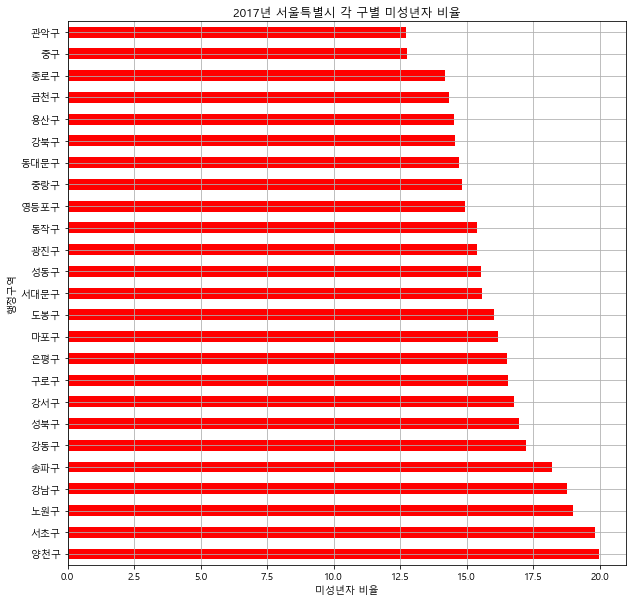

In [206]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2017['미성년자_비율'].plot(kind='barh', grid=True, color='red')
plt.title('2017년 서울특별시 각 구별 미성년자 비율')
plt.xlabel('미성년자 비율')
plt.show()


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2018년 서울특별시 각 구별 미성년자 비율')

Text(0.5, 0, '미성년자 비율')

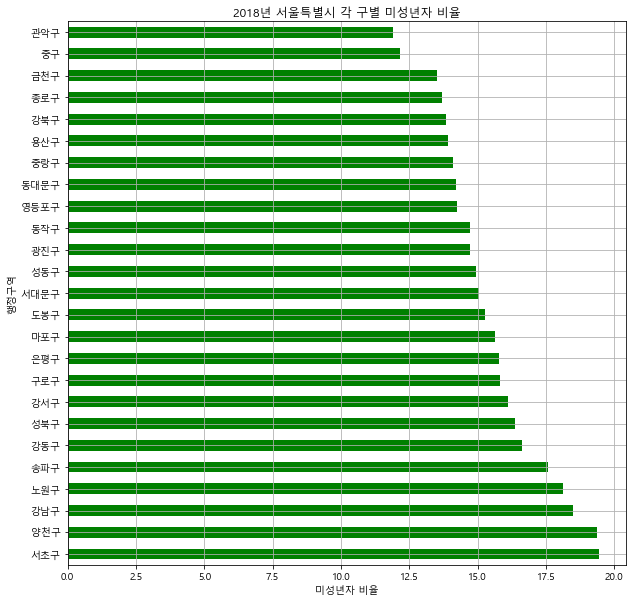

In [207]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2018['미성년자_비율'].plot(kind='barh', grid=True, color='green')
plt.title('2018년 서울특별시 각 구별 미성년자 비율')
plt.xlabel('미성년자 비율')
plt.show()


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2019년 서울특별시 각 구별 미성년자 비율')

Text(0.5, 0, '미성년자 비율')

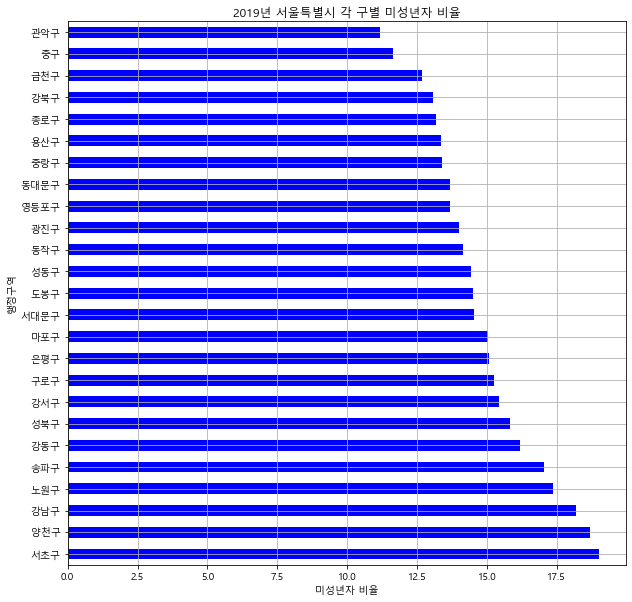

In [208]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2019['미성년자_비율'].plot(kind='barh', grid=True, color='blue')
plt.title('2019년 서울특별시 각 구별 미성년자 비율')
plt.xlabel('미성년자 비율')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2020년 서울특별시 각 구별 미성년자 비율')

Text(0.5, 0, '미성년자 비율')

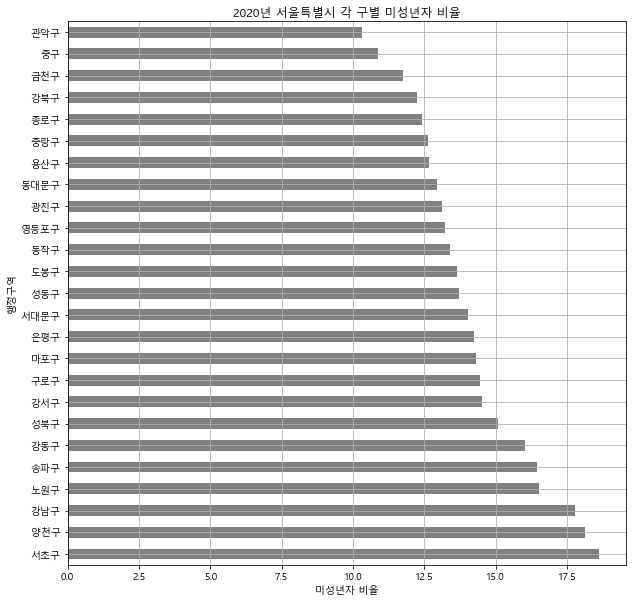

In [209]:
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2020['미성년자_비율'].plot(kind='barh', grid=True, color='gray')
plt.title('2020년 서울특별시 각 구별 미성년자 비율')
plt.xlabel('미성년자 비율')
plt.show()

# 성인비율 그래프

In [210]:

df_age_2017 = df_age_2017.sort_values(by='성인_비율', ascending = False)
df_age_2018 = df_age_2018.sort_values(by='성인_비율', ascending = False)
df_age_2019 = df_age_2019.sort_values(by='성인_비율', ascending = False)
df_age_2020 = df_age_2020.sort_values(by='성인_비율', ascending = False)


In [211]:
df_age_2020.head(5)

,기간,미성년자,청년,성인,노인,남성_인구,여성_인구,총인구수,미성년자_비율,청년_비율,성인_비율,노인_비율,남녀_성비
행정구역,,,,,,,,,,,,,
관악구,2020,50972,195916,332452,111636,248339,246721,495060,10.30,39.57,67.15,22.55,100.66
광진구,2020,45503,118923,225946,75233,167310,179372,346682,13.13,34.30,65.17,21.70,93.28
마포구,2020,53271,126390,241640,76979,175150,196740,371890,14.32,33.99,64.98,20.70,89.03
영등포구,2020,50114,128321,241690,87676,187647,191833,379480,13.21,33.81,63.69,23.10,97.82
성동구,2020,40264,93948,186216,67076,143387,150169,293556,13.72,32.00,63.43,22.85,95.48


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2017년 서울특별시 각 구별 성인 비율')

Text(0.5, 0, '성인 비율')

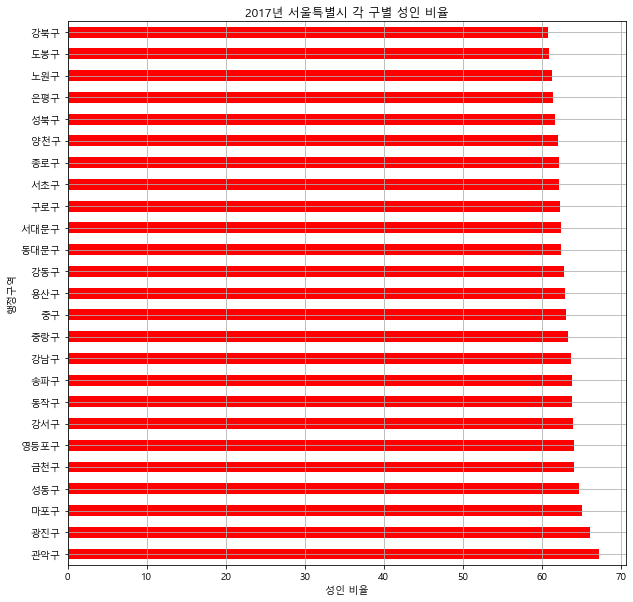

In [212]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2017['성인_비율'].plot(kind='barh', grid=True, color='red')
plt.title('2017년 서울특별시 각 구별 성인 비율')
plt.xlabel('성인 비율')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2018년 서울특별시 각 구별 성인 비율')

Text(0.5, 0, '성인 비율')

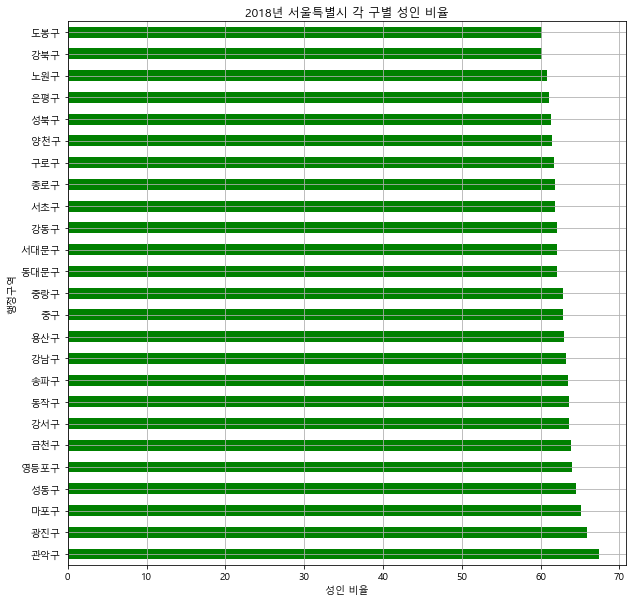

In [213]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2018['성인_비율'].plot(kind='barh', grid=True, color='green')
plt.title('2018년 서울특별시 각 구별 성인 비율')
plt.xlabel('성인 비율')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2019년 서울특별시 각 구별 성인 비율')

Text(0.5, 0, '성인 비율')

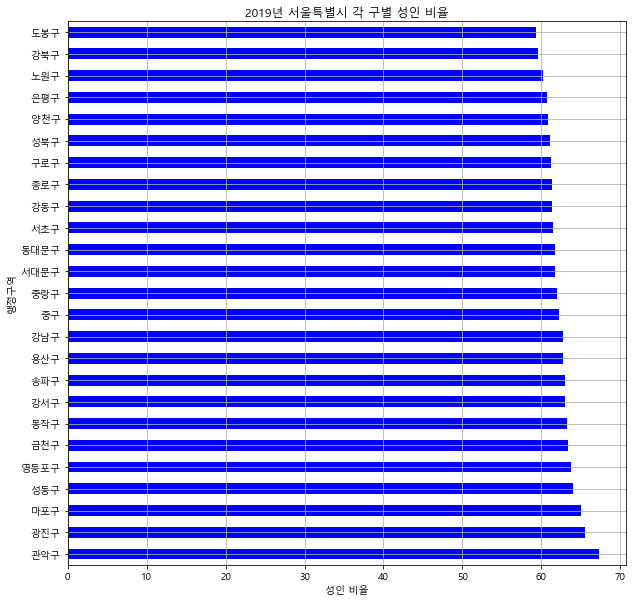

In [214]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2019['성인_비율'].plot(kind='barh', grid=True, color='blue')
plt.title('2019년 서울특별시 각 구별 성인 비율')
plt.xlabel('성인 비율')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2020년 서울특별시 각 구별 성인 비율')

Text(0.5, 0, '성인 비율')

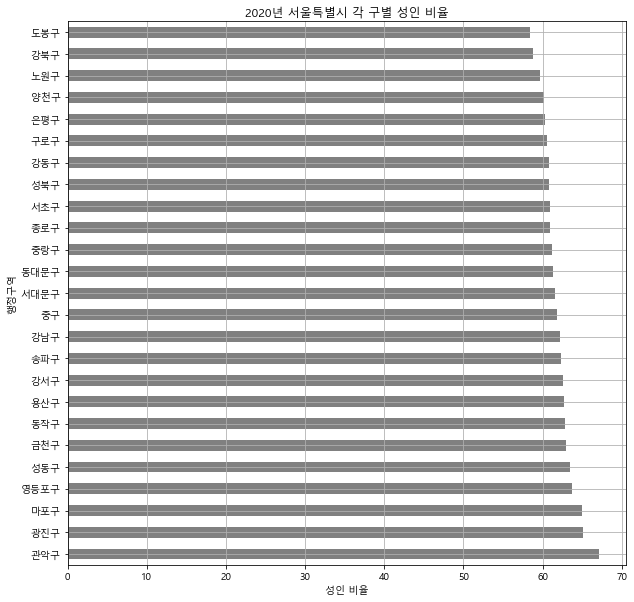

In [215]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2020['성인_비율'].plot(kind='barh', grid=True, color='gray')
plt.title('2020년 서울특별시 각 구별 성인 비율')
plt.xlabel('성인 비율')
plt.show()

# 남녀 성비 그래프

In [216]:

df_age_2017 = df_age_2017.sort_values(by='남녀_성비', ascending = False)
df_age_2018 = df_age_2018.sort_values(by='남녀_성비', ascending = False)
df_age_2019 = df_age_2019.sort_values(by='남녀_성비', ascending = False)
df_age_2020 = df_age_2020.sort_values(by='남녀_성비', ascending = False)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2017년 서울특별시 각 구별 남녀 성비')

Text(0.5, 0, '남녀 성비')

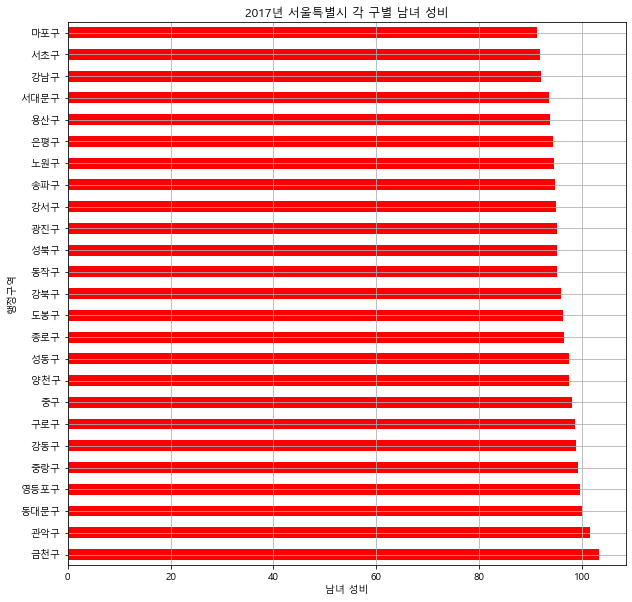

In [217]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2017['남녀_성비'].plot(kind='barh', grid=True, color='red')
plt.title('2017년 서울특별시 각 구별 남녀 성비')
plt.xlabel('남녀 성비')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2018년 서울특별시 각 구별 남녀 성비')

Text(0.5, 0, '남녀 성비')

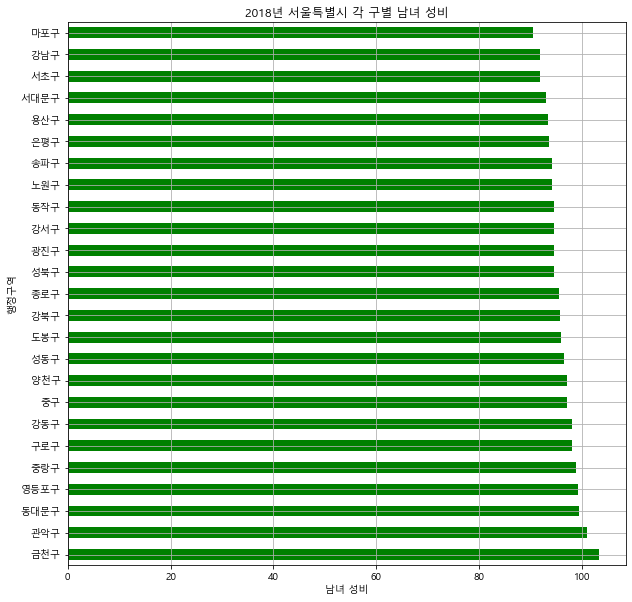

In [218]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2018['남녀_성비'].plot(kind='barh', grid=True, color='green')
plt.title('2018년 서울특별시 각 구별 남녀 성비')
plt.xlabel('남녀 성비')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2019년 서울특별시 각 구별 남녀 성비')

Text(0.5, 0, '남녀 성비')

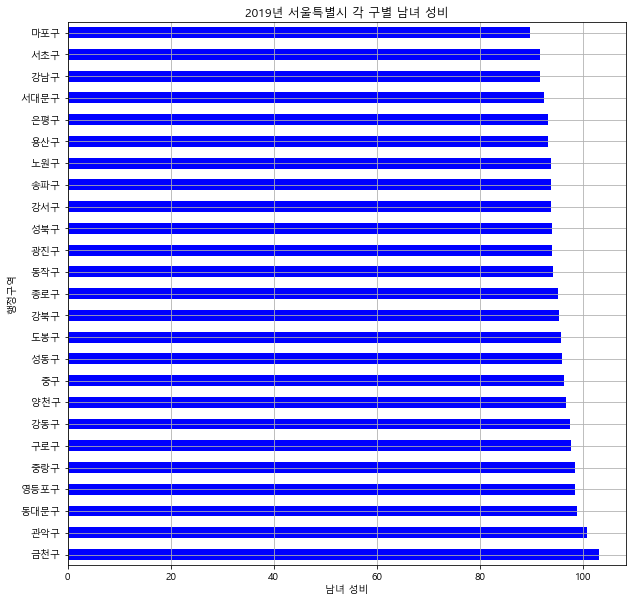

In [219]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2019['남녀_성비'].plot(kind='barh', grid=True, color='blue')
plt.title('2019년 서울특별시 각 구별 남녀 성비')
plt.xlabel('남녀 성비')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='행정구역'>

Text(0.5, 1.0, '2020년 서울특별시 각 구별 남녀 성비')

Text(0.5, 0, '남녀 성비')

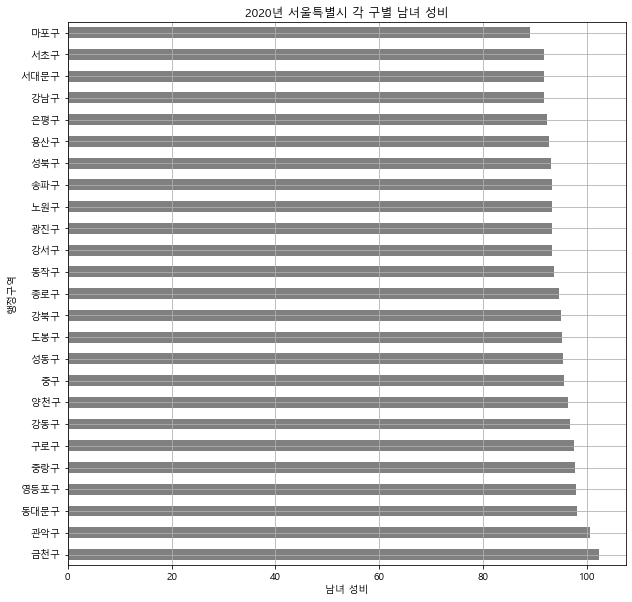

In [221]:
    
plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
df_age_2020['남녀_성비'].plot(kind='barh', grid=True, color='gray')
plt.title('2020년 서울특별시 각 구별 남녀 성비')
plt.xlabel('남녀 성비')
plt.show()

# 2017~ 2020 성인 비율 그래프
